# Proyecto 1

Natalia Isabel Padilla Terrones 173716
Lorena Patricia Barrera Rodríguez 164694

## Preguntas

### 1. ¿Cuál es la variable target?

La variable target es **churn** o **no churn**, es decir que el objetivo del modelo es si el cliente abandonará la empresa o seguirá siendo cliente; por lo tanto, la etiqueta positiva es *churn*. En este caso, un *positivo verdadero* (TP) es si el modelo detecta que un cliente va a churnear y, efectivamente, churnea; un *negativo verdadero* (TN) es si el modelo detecta que un cliente no va a churnear y, efectivamente, no churnea; un *falso positivo* (FP) es si el modelo detecta que un cliente va a churnear, pero al final no lo hace; y finalmente, un *falso negativo* (FN) es si el modelo detecta que un cliente no va a churnear, pero al final sí lo hace.
Para esa situación, es preferible minimizar los falsos negativos porque son los casos que más pueden "afectar" a la empresa ya que con los FP la empresa no pierde clientes y con los FN sí. Para poder cumplir con lo dicho anteriormente, y de acuerdo al contexto del problema, la métrica que se necesita optimizar es el *recall*.


### 2. Genera el data profiling de las variables totalcharges y la variable contract interpreta la salida.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/lorenabarrera/.pyenv/versions/itam_md/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Se lee la base de datos
empresa = pd.read_csv('/Users/lorenabarrera/Documents/Minería de Datos/Telco-Customer-Churn.csv', sep=',')
#empresa.rename(columns={'LugarMuerte': 'lugar_muerte'},
 #            inplace=True)

In [3]:
empresa.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Limpieza de datos

In [4]:
empresa.rename(columns={'customerID': 'customer_id', 'SeniorCitizen':'senior_citizen', 
                        'Partner':'partner', 'Dependents':'dependents', 'PhoneService':'phone_service',
                        'MultipleLines':'multiple_lines', 'InternetService':'internet_service',
                        'OnlineSecurity':'online_security', 'OnlineBackup':'online_backup',
                        'DeviceProtection':'device_protection', 'TechSupport':'tech_support',
                        'StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_movies',
                        'Contract':'contract', 'PaperlessBilling':'paperless_billing', 
                        'PaymentMethod':'payment_method', 'MonthlyCharges':'monthly_charges',
                        'TotalCharges':'total_charges', 'Churn':'churn'}, inplace=True)


In [5]:
empresa.customer_id.count()

7043

In [6]:
empresa.replace(' ', np.nan, inplace = True)
empresa.dropna(inplace = True)
empresa.reset_index(drop=True, inplace=True)
empresa.customer_id.count()

7032

#### Tipos de variables

Se analizan los datos de las columnas:

In [7]:
# Tipos de las variables
empresa.dtypes

customer_id           object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

Observamos cuántas columnas tienen determinadas características:

In [8]:
# Variables numéricas
number_variables = empresa.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(3, array(['senior_citizen', 'tenure', 'monthly_charges'], dtype=object))

Hay 3 columnas dentro de la tabla que son de tipo *number*

In [9]:
# Variables categóricas
category_variables = empresa.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(0, array([], dtype=object))

Hay 0 columnas dentro de la tabla que son de tipo *category*

In [10]:
# Fechas 
dates_variables = empresa.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(0, array([], dtype=object))

Hay 0 columnas dentro de la tabla que son de tipo *datetime*

In [11]:
# Strings 
string_variables = empresa.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(18,
 array(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
        'multiple_lines', 'internet_service', 'online_security',
        'online_backup', 'device_protection', 'tech_support',
        'streaming_tv', 'streaming_movies', 'contract',
        'paperless_billing', 'payment_method', 'total_charges', 'churn'],
       dtype=object))

Hay 18 columnas dentro de la tabla del tipo *object*

In [12]:
# Verifica que todas las columnas hayan sido analizadas
if (sum([len(number_variables), len(category_variables), 
      len(dates_variables), len(string_variables)]) == empresa.shape[1]): 
    print('Se han verificado todas las columnas')
else:
    print('Faltan columnas por verificar')

Se han verificado todas las columnas


In [13]:
def get_repeated_values(df, col, top):
    top_5 = df.groupby([col])[col]\
                    .count()\
                    .sort_values(ascending = False)\
                    .head()
    indexes_top_5 = top_5.index
    
    if ((top == 1) and (len(indexes_top_5) > 0)):
        return indexes_top_5[0]
    elif ((top == 2) and (len(indexes_top_5) > 1)):
        return indexes_top_5[1]
    elif ((top == 3) and (len(indexes_top_5) > 2)):
        return indexes_top_5[2]
    else: 
        return 'undefined'

In [14]:
# Función para ver el data profiling
def category_profiling(df, col, profiling_dict):
    """
    Profiling for categoric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'mode': df[col].mode()[0],
                     'num_categories': df[col].nunique(),
                     'categories': df[col].unique(),
                     #'uniques': df[col].nunique(),
                     'missings': sum(df[col].isna())/df[col].size*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    profiling_dict.update({col: profiling})
    
    return profiling_dict

In [15]:
profiling_category_dict = {}

category_profiling_output_tc = [category_profiling(empresa, "total_charges", profiling_category_dict)]
category_profiling_output_tc

[{'total_charges': {'mode': '20.2',
   'num_categories': 6530,
   'categories': array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
         dtype=object),
   'missings': 0.0,
   'top1_repeated': '20.2',
   'top2_repeated': '19.75',
   'top3_repeated': '19.65'}}]

In [16]:
profiling_category_dict = {}

category_profiling_output_tc = [category_profiling(empresa, "contract", profiling_category_dict)]
category_profiling_output_tc

[{'contract': {'mode': 'Month-to-month',
   'num_categories': 3,
   'categories': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
   'missings': 0.0,
   'top1_repeated': 'Month-to-month',
   'top2_repeated': 'Two year',
   'top3_repeated': 'One year'}}]

In [17]:
#category_profiling_output
df_category_profiling = pd.DataFrame(category_profiling_output_tc[0]).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,contract
0,categories,"[Month-to-month, One year, Two year]"
1,missings,0.0
2,mode,Month-to-month
3,num_categories,3
4,top1_repeated,Month-to-month
5,top2_repeated,Two year
6,top3_repeated,One year


## INTERPRETACIÓN

In [18]:
def numeric_profiling(df, col, profiling_dict):
    """
    Profiling for numeric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique(),
                     'prop_missings': sum(df[col].isna())/df[col].size*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    profiling_dict.update({col: profiling})
    
    return profiling_dict

In [19]:
profiling_dict = {}

numeric_profiling_output = [numeric_profiling(empresa, "senior_citizen", profiling_dict)]
numeric_profiling_output = [numeric_profiling(empresa, "tenure", profiling_dict)]
numeric_profiling_output = [numeric_profiling(empresa, "monthly_charges", profiling_dict)]


In [20]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output[0]).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,senior_citizen,tenure,monthly_charges
0,max,1,72.000000,118.750000
1,min,0,1.000000,18.250000
2,mean,0.1624,32.421786,64.798208
3,stdv,0.368844,24.545260,30.085974
4,25%,0.0,9.000000,35.587500
5,median,0.0,29.000000,70.350000
6,75%,0.0,55.000000,89.862500
7,kurtosis,1.353321,-1.387823,-1.256156
8,skewness,1.831103,0.237731,-0.222103
9,uniques,2,72.000000,1584.000000


## INTERPRETACIÓN

## 3. Genera un EDA con 4 gráficas


### Proporción de *churn* y *no churn*

Text(0, 0.5, 'Churn')

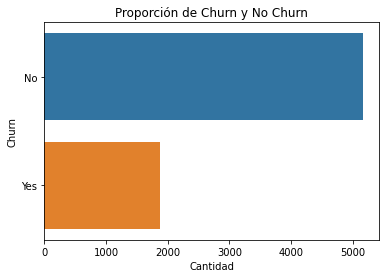

In [21]:
sns.countplot(y="churn", data=empresa).\
set_title("Proporción de Churn y No Churn")
plt.xlabel("Cantidad")
plt.ylabel("Churn")

**INTERPRETACIÓN**

### Distribución de la variable *totalcharges* por contract y churn

In [22]:
out=empresa['total_charges'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

Text(0, 0.5, 'Total Charges')

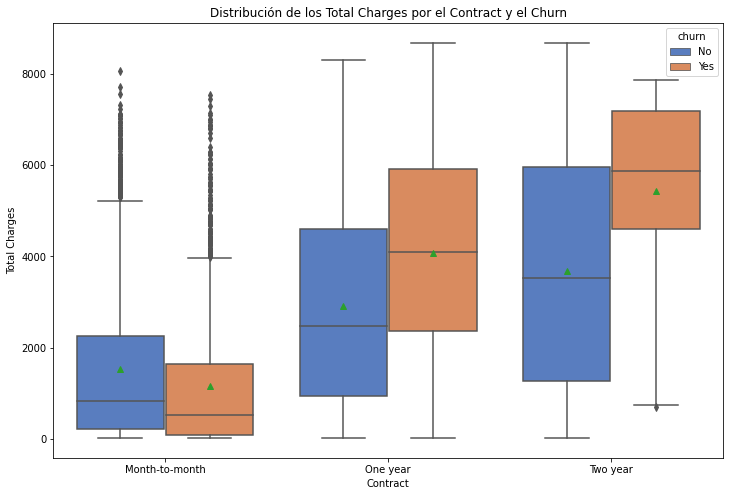

In [23]:
fig_dims=(12, 8)
fig, ax=plt.subplots(figsize=fig_dims)
sns.boxplot(data=empresa, x='contract', y=out, hue = 'churn', showmeans=True, palette='muted')\
.set_title("Distribución de los Total Charges por el Contract y el Churn")
plt.xlabel("Contract")
plt.ylabel("Total Charges")

**INTERPRETACIÓN**

### Distribución de la variable *monthlycharges* por contract y churn

Text(0, 0.5, 'Monthly Charges')

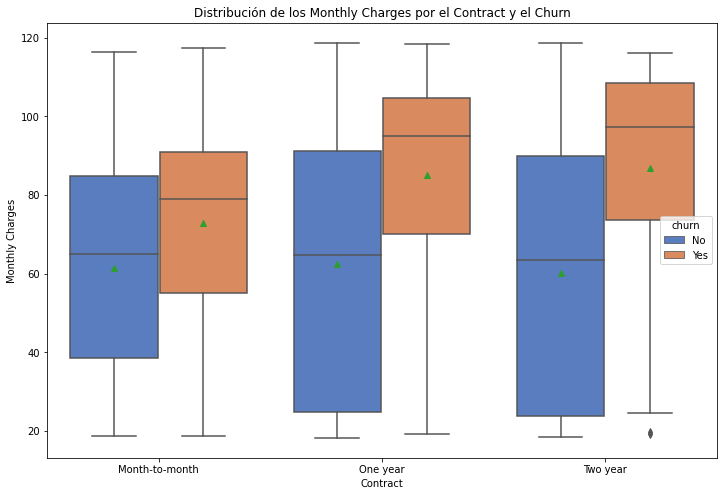

In [24]:
fig_dims=(12, 8)
fig, ax=plt.subplots(figsize=fig_dims)
sns.boxplot(data=empresa, x='contract', y='monthly_charges', hue = 'churn', showmeans=True, palette='muted')\
.set_title("Distribución de los Monthly Charges por el Contract y el Churn")
plt.xlabel("Contract")
plt.ylabel("Monthly Charges")

**INTERPRETACIÓN**

### Distribución de la variable monthlycharges por paymentmethod y churn

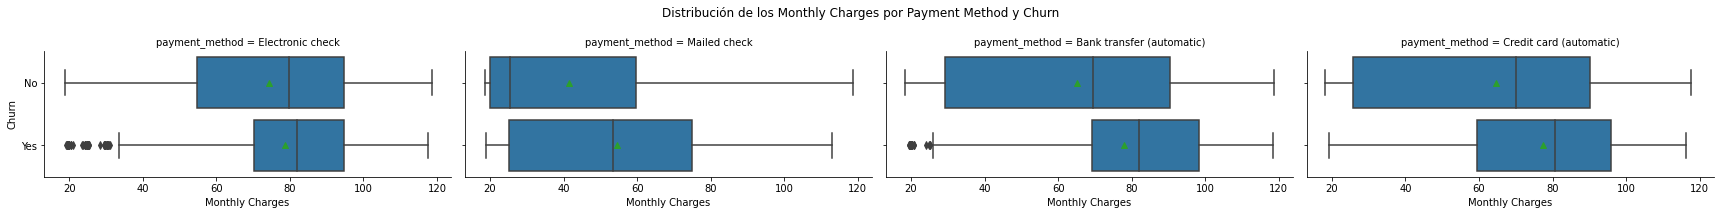

In [25]:
d=sns.FacetGrid(empresa, col='payment_method', aspect=2)
d.map_dataframe(sns.boxplot, x="monthly_charges", y="churn", showmeans=True)
d.fig.suptitle('Distribución de los Monthly Charges por Payment Method y Churn')
d.axes[0,0].set_xlabel('Monthly Charges')
d.axes[0,1].set_xlabel('Monthly Charges')
d.axes[0,2].set_xlabel('Monthly Charges')
d.axes[0,3].set_xlabel('Monthly Charges')
d.axes[0,0].set_ylabel('Churn')
plt.tight_layout()

**INTERPRETACIÓN**

## Preprocesamiento

Cambia las variables gender, seniorcitizen, partner, phoneservice, paperlessbilling y churn a variables binarias con valor posible 0 para el caso No y 1 para el caso Yes.

In [26]:
empresa

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [27]:
# Cambia los "Yes" a 1s y los "No" a 0s (Excepto gender en el que "Female" es 1 y "Male" es 0)
empresa["gender"].replace({"Female": 1, "Male": 0}, inplace = True)
empresa["partner"].replace({"Yes": 1, "No": 0}, inplace = True)
empresa["phone_service"].replace({"Yes": 1, "No": 0}, inplace = True)
empresa["paperless_billing"].replace({"Yes": 1, "No": 0}, inplace = True)
empresa["churn"].replace({"Yes": 1, "No": 0}, inplace = True)
empresa["dependents"].replace({"Yes": 1, "No": 0}, inplace = True)

In [28]:
empresa.groupby(['multiple_lines']).count() 

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
multiple_lines,,,,,,,,,,,,,,,,,,,,
No,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385
No phone service,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680
Yes,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967


Transforma las variables a una codificación de one hot encoding: multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paymentmethod.

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
ohe = OneHotEncoder()
ohe_df = pd.DataFrame()

In [31]:
ohe_var = ["multiple_lines", "internet_service", "online_security", "online_backup", "device_protection", 
           "tech_support", "streaming_tv", "streaming_movies", "contract", "payment_method"]

In [32]:
for i in range(len(ohe_var)):
    columna = ohe_var[i]
    ohe_ = ohe.fit_transform(empresa[columna].values.reshape(-1,1))
    df_ohe = pd.DataFrame(list(ohe_.toarray()), columns = columna + "_" + empresa[columna].unique())
    ohe_df = pd.merge(df_ohe, ohe_df, how="left", left_index = True, right_index = True)

In [33]:
ohe_df

,payment_method_Electronic check,payment_method_Mailed check,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),contract_Month-to-month,contract_One year,contract_Two year,streaming_movies_No,streaming_movies_Yes,streaming_movies_No internet service,...,online_backup_No internet service,online_security_No,online_security_Yes,online_security_No internet service,internet_service_DSL,internet_service_Fiber optic,internet_service_No,multiple_lines_No phone service,multiple_lines_No,multiple_lines_Yes
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7029,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7030,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
empresa = empresa.drop(ohe_var, axis = 1)

In [35]:
empresa = pd.concat([empresa, ohe_df], axis=1)

In [36]:
empresa.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,...,online_backup_No internet service,online_security_No,online_security_Yes,online_security_No internet service,internet_service_DSL,internet_service_Fiber optic,internet_service_No,multiple_lines_No phone service,multiple_lines_No,multiple_lines_Yes
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.5,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Modelado

In [37]:
np.random.seed(210418)

In [38]:
y = empresa.churn
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: churn, Length: 7032, dtype: int64

In [39]:
## Se quita la columna churn (es el target) y customer_id (causa conflicto en el árbol)
X = empresa.drop(['churn', 'customer_id'], axis = 1)
X

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,payment_method_Electronic check,...,online_backup_No internet service,online_security_No,online_security_Yes,online_security_No internet service,internet_service_DSL,internet_service_Fiber optic,internet_service_No,multiple_lines_No phone service,multiple_lines_No,multiple_lines_Yes
0,1,0,1,0,1,0,1,29.85,29.85,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,56.95,1889.5,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,2,1,1,53.85,108.15,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,45,0,0,42.30,1840.75,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,1,1,70.70,151.65,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24,1,1,84.80,1990.5,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,1,0,1,1,72,1,1,103.20,7362.9,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7029,1,0,1,1,11,0,1,29.60,346.45,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7030,0,1,1,0,4,1,1,74.40,306.6,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [40]:
## separando en train, test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## verificando los tamaños de nuestros 4 sets
print("entrenamiento: X: {}, y: {}".format(X_train.shape, y_train.shape))
print("prueba: X: {}, y: {}".format(X_test.shape, y_test.shape))

entrenamiento: X: (5274, 40), y: (5274,)
prueba: X: (1758, 40), y: (1758,)


In [41]:
## Configuración del Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

# n_estimators corresponde al número de árboles que queremos crear: 'n_estimators': [300, 500, 800, 1000],
grid = {'n_estimators': [1], 'random_state': [5432], 'max_depth': [5, 7, 11], 'min_samples_leaf': [7, 9, 11, 13], 
        'criterion':['gini','entropy'] }

rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
gs_rf = GridSearchCV(rf, grid, cv=5, scoring='recall', return_train_score=True, n_jobs=-1)

start = time.time()
# entrenando los random forest
gs_rf.fit(X_train, y_train)
print("tiempo de ejecución en segundos: {}".format(time.time() - start))

tiempo de ejecución en segundos: 9.832056999206543


/Users/lorenabarrera/.pyenv/versions/itam_md/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/lorenabarrera/.pyenv/versions/itam_md/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Se generan **24 modelos**, es decir que se genera un modelo por cada combinación posible entre los parámetros dados. 

Por lo tanto: 1 x 1 x 3 x 4 x 2 = 24 modelos.

In [42]:
# mejor configuración 
importancias = gs_rf.best_estimator_.feature_importances_
importancias

array([0.00000000e+00, 1.07417938e-02, 2.69602652e-03, 0.00000000e+00,
       3.05566435e-02, 1.11771984e-05, 7.41650832e-03, 1.52345681e-01,
       1.90973234e-01, 5.85248887e-04, 5.17627632e-04, 1.02583229e-02,
       1.61484044e-03, 3.83476415e-03, 1.33088842e-02, 1.49145318e-01,
       1.41869273e-04, 0.00000000e+00, 4.29207237e-03, 3.60917398e-03,
       0.00000000e+00, 0.00000000e+00, 3.26547896e-02, 3.26290536e-03,
       4.77429780e-03, 1.04000417e-02, 0.00000000e+00, 0.00000000e+00,
       1.14955750e-02, 0.00000000e+00, 3.88426708e-03, 3.03482066e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.76273379e-02,
       1.72866471e-02, 3.08288572e-03, 0.00000000e+00, 0.00000000e+00])

In [43]:
# Índices de los más importantes (están ordenados de menor a mayor)
imp_3 = np.argsort(importancias)[[-1, -2, -3]]
imp_3

array([31,  8,  7])

In [44]:
# Columnas importantes
X.columns[imp_3]

Index(['online_security_No', 'total_charges', 'monthly_charges'], dtype='object')

In [45]:
# Porcentaje de importancia de las columnas importantes
importancias[imp_3]

array([0.30348207, 0.19097323, 0.15234568])

Las tres variables más importantes para la predicción son si no contrataron un servicio de seguridad online (online_security_No) con 30% de importancia; el total de cargos (total_charge) con 19% de importancia; y los cargos mensuales (monthly_charges) con 15% de importancia.

In [46]:
# Variables que no importan
no_imp = np.where(importancias < 0.01)
var_no_imp = X.columns[no_imp]
var_no_imp

Index(['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'payment_method_Credit card (automatic)', 'contract_Month-to-month',
       'streaming_movies_No', 'streaming_movies_Yes',
       'streaming_movies_No internet service', 'streaming_tv_No',
       'streaming_tv_Yes', 'streaming_tv_No internet service',
       'tech_support_Yes', 'tech_support_No internet service',
       'device_protection_Yes', 'device_protection_No internet service',
       'online_backup_No', 'online_backup_No internet service',
       'online_security_Yes', 'online_security_No internet service',
       'internet_service_DSL', 'multiple_lines_No phone service',
       'multiple_lines_No', 'multiple_lines_Yes'],
      dtype='object')

In [47]:
X_train = X_train.drop(var_no_imp, axis = 1)
X_test = X_test.drop(var_no_imp, axis = 1)

In [48]:
X_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,payment_method_Bank transfer (automatic),contract_One year,contract_Two year,tech_support_No,device_protection_No,online_backup_Yes,online_security_No,internet_service_Fiber optic,internet_service_No
5512,0,59,64.65,3735.45,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6471,0,13,53.45,718.1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
615,0,8,25.25,186.3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2521,0,1,19.40,19.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
571,0,11,64.90,697.25,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


No se debe volver a hacer un X_train y X_test porque la información con la que se ha trabajado se modificaría ya que se agregaría información que no debería tener y los resultados se verían sesgados.

In [ ]:
# n_estimators corresponde al número de árboles que queremos crear: 
grid = {'random_state': [7654], 'max_depth': [11, 13, 15], 'n_estimators': [500, 800, 1000], 
        'min_samples_leaf': [11, 13], 'criterion':['gini','entropy'] }

rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
gs_rf = GridSearchCV(rf, grid, cv=5, scoring='recall', return_train_score=True, n_jobs=-1)

start = time.time()
# entrenando los random forest
gs_rf.fit(X_train, y_train)
print("tiempo de ejecución en segundos: {}".format(time.time() - start))

Se generan **36 modelos**, es decir que se genera un modelo por cada combinación posible entre los parámetros dados. 

Por lo tanto: 1 x 3 x 3 x 2 x 2 = 36 modelos.

In [ ]:
# mejor configuración 
importancias_rf = gs_rf.best_estimator_.feature_importances_
importancias_rf

In [ ]:
# Índice del más importantes (están ordenados de menor a mayor)
imp = np.argsort(importancias_rf)[-1]
imp

In [ ]:
X_train.columns[imp]

In [ ]:
importancias_rf[imp]

La variable raíz para el modelo es **tenure** con un porcentaje de 19% de información proporcionada.

Los mejores hiperparámetros para el modelo son:

In [ ]:
# mejor configuración 
gs_rf.best_estimator_

### Predicción

In [ ]:
# predicciones con el mejor predictor 
predicted_labels = gs_rf.predict(X_test)
predicted_labels[:10]

In [ ]:
# predicciones en score con el mejor predictor
predicted_scores = gs_rf.predict_proba(X_test)
predicted_scores[:10]

### ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, predicted_labels)))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

La curva ROC está por encima del ángulo de 45ºy el AUC de nuestro modelo es de 0.67. Entonces, existe un 67% de probabilidad de que el modelo sea capaz de distinguir una muestra positiva y una muestra negativa. Por lo tanto, el modelo tiene un buen desempeño para predecir qué clientes harán *churn*.

In [ ]:
#### Precision, recall, thresholds
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

precision, recall, thresholds_2 = precision_recall_curve(y_test, predicted_scores[:,1], pos_label=1)
thresholds_2 = np.append(thresholds_2, 1)
(precision.shape, recall.shape, thresholds_2.shape)

plt.clf()
plot_precision_recall_curve(gs_rf, X_test, y_test)
plt.title("Precision-recall curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

**INTERPRETACIÓN**
¿cuánto recall tienes para un precision de 70%?

In [ ]:
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

In [ ]:
metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report

¿Qué punto de corte cumple con las restricciones de negocio? A 6 decimales. Interpreta.
¿Qué porcentaje de recall tienes en ese punto? Explica.
¿Qué porcentaje de precision tienes en ese punto? Explica.

In [ ]:
negocio = metrics_report[metrics_report.fpr <= 0.02]
negocio

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted_labels)

**INTERPRETACIÓN**